# BUSINESS UNDERSTANDING

You can’t build a future on a dry well, yet millions of Tanzanians are forced to try. Millions of Tanzanians wake up each day unsure if the nearest well will provide safe, reliable water. Despite significant investments in rural water supply, wells; the backbone of access for much of the country, remain fragile infrastructure.

In 2025, Tanzania’s population is estimated at 70.5 million, with nearly one in three people (24–25 million) depending on wells and boreholes as their primary source of drinking water. These wells represent not just infrastructure, but lifelines for health, livelihoods, and dignity. Unfortunately, many fail within just a few years due to poor construction, lack of spare parts, environmental stress, or limited maintenance capacity.

The consequences are devastating:

* Health risks: Communities without functioning wells often turn to unsafe surface water, exposing themselves to waterborne diseases like cholera and dysentery.

* Economic loss: When wells fail, households spend time and money securing alternatives, reducing productivity and straining already limited resources.

* Education & gender equity: The burden of fetching water falls disproportionately on women and children, pulling girls out of classrooms and limiting women’s participation in economic activity.

* Wasted investment: Donor funds and government budgets spent on drilling wells are wasted if infrastructure collapses prematurely.

This challenge is not unique to Tanzania. It echoes across sub-Saharan Africa, but the scale here is stark. The Water Sector Development Program (WSDP), aligned with Sustainable Development Goal 6 (Clean Water and Sanitation), recognizes that simply drilling more wells is not enough. Sustainability is the frontier: keeping existing water points functional is as critical as expanding new access.

The guiding question becomes:

**Can we predict the operational status of a well, functional, needs repair, or non-functional, before communities are left dry?**

Framing this as a data science problem unlocks powerful opportunities:

* Proactive maintenance: Predictive insights can direct scarce technical teams to wells most at risk, preventing breakdowns before they occur.

* Smarter investments: Policymakers and NGOs can channel resources into areas where the risk of failure is highest, stretching limited budgets further.

* Community resilience: Reduced downtime means families, schools, and clinics can count on reliable access to water, improving overall well-being.

* Accountability & transparency: Data-driven decisions strengthen trust between communities, government, and development partners.

This project is more than a technical exercise. It is about ensuring that the promise of safe water lasts longer than the photo-op of a ribbon-cutting ceremony. It is about shifting the narrative from building wells to building resilience. If successful, predictive modeling can turn reactive repairs into proactive strategies, and help ensure that every drop counts toward Tanzania’s development journey.

## PROBLEM STATEMENT

Despite heavy investments in rural water infrastructure, a significant share of Tanzania’s wells are non-functional or in disrepair at any given time. This creates severe health, economic, and social burdens for the millions of people who rely on them. Traditional monitoring methods are often reactive, costly, and slow, leaving communities without reliable water for extended periods.

The challenge is to develop a predictive model that can classify the operational status of wells, functional, functional but needs repair, or non-functional. By identifying at-risk wells in advance, decision-makers can prioritize maintenance, reduce downtime, and improve the sustainability of rural water access.

This problem is fundamentally a multi-class classification task, where the goal is to use historical and environmental data about wells (e.g., location, construction type, usage, and water quality) to predict their current functionality.

## OBJECTIVES

### General Objective

To develop a data-driven framework that predicts the functionality of water wells in Tanzania, enabling proactive maintenance and sustainable water access for communities.

### Specific Objectives

* Identify the key drivers of well failures by analyzing historical, geographic, and infrastructural data.

* Build and evaluate predictive models to classify wells into three categories: functional, functional but needs repair, and non-functional.

* Generate actionable insights and visualizations that help policymakers and NGOs prioritize interventions.

* Assess the relative importance of features (e.g construction type, location, usage) to guide future data collection and infrastructure planning.

* Provide a scalable, reproducible approach that can be adapted to other regions facing similar water access challenges.

## SUCCESS METRICS

### Model Performance

* Achieve at least 75% overall accuracy in classifying well status (functional, needs repair, non-functional).

* Attain ≥75% recall on non-functional wells, ensuring at-risk communities are not overlooked.

* Reach balanced precision-recall trade-offs across all classes to avoid bias toward majority classes.

### Interpretability and Insights

* Deliver clear, interpretable feature importance rankings that explain drivers of well failure.

* Provide easy-to-understand visualizations and dashboards that policymakers, NGOs, and engineers can act upon without technical expertise.

### Practical Impact

* Enable prioritization of maintenance interventions, reducing downtime of critical wells.

* Ensure the framework is scalable and reproducible, so it can be applied to other regions or expanded with new data sources.

# DATA UNDERSTANDING

This project uses the Tanzania water wells dataset, compiled by **Taarifa** in collaboration with the **Tanzanian Ministry of Water**, and made public through the [DrivenData “Pump It Up” competition](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). It provides detailed records of rural water points across Tanzania, making it a rich source for understanding well functionality. 

The dataset is split into three parts:  

- **Training set values.csv:** Feature data for training.  
- **Training set labels.csv:** Target labels linked to the training set.  
- **Test set values.csv:** Feature data for the test set.

Since our ultimate goal is predictive modeling, we treat these datasets differently:  

- Training data: Merged (values and labels) and used for a full exploratory deep dive. This is where we study feature distributions, relationships, and the drivers of well failure.  
- Test data: Kept separate. Only used for sanity checks (consistency of categories, ranges, and missing values) and final model evaluation. No target-based exploration is possible here. 

At this stage, we’re focusing on:  

- Dataset overview: Rows, columns, data types, and overall structure.  
- Data quality check: Missing values, outliers, and duplicates that could distort analysis.  
- Feature exploration (train only): Distributions of numeric and categorical features.  
- Target variable deep dive (train only): Breakdown of the three classes (functional, needs repair, non-functional), checking for balance or skew.  
- Initial insights: Early signals such as pump types that fail more often, or regions with higher breakdown rates. 

## DATASET OVERVIEW

We first import all the necessary libraries.

In [81]:
# Utilities
import warnings
warnings.filterwarnings('ignore')

# Mathematical Operations
import numpy as np

# Data Manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

import seaborn as sns

Then load the datasets.

In [82]:
# Training values (features)
train_values_df = pd.read_csv("Data\Training set values.csv")

# Training labels (targets)
train_labels_df = pd.read_csv("Data\Training set labels.csv")

# Test values (features only)
test_df = pd.read_csv("Data\Test set values.csv")

Since the training labels (Training set labels) file contains only the target variable, we’ll merge it with the training features (Training set values) file using the shared 'id' column. This gives us a single, consolidated dataset that’s ready for full exploratory data analysis (EDA).  

In [83]:
# Merge training values and labels
train_df = train_values_df.merge(train_labels_df, on = 'id')

Next, we will check the overall structure for the new training dataset.

In [84]:
# Load entire dataset
train_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [85]:
# Check the shape of the dataset
print(f"The features dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The features dataset has 59400 rows and 41 columns.


> *Observation:* This is a sizable dataset; over **59,000 rows** across **41 columns**. Plenty of information to work with!  

Next, let’s take a look at the column names to see how clean and intuitive they are.  

In [86]:
# Check column names
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

> *Observation:* The column names are already well-structured, no typos, no trailing spaces, no random casing issues. Credit where it’s due: the data collection was done cleanly.  

Next, we’ll move into metadata inspection. Metadata is essentially *data about the data*. It helps us understand the overall structure and quality of the dataset. This step lets us:  
- Spot null distributions.  
- Distinguish between numerical and categorical features.  
- Get an early sense of how tidy (or messy) things really are. 

Afterwards, we will separate the categorical and numerical features.

Let’s dive in.  

In [87]:
# Get metadata
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [88]:
# Get numerical columns
train_df.select_dtypes(include = 'number').columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

> *Observation:* No obvious type mismatches here. The features that should be numeric are indeed stored as numeric.  

To confirm, let’s dig deeper by checking the summary statistics. This not only validates the data types but also gives us a first glimpse into the distribution and range of these features.  

In [89]:
# Get descriptive statistics for numerical columns
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


Let's visualise this so it's clearer.

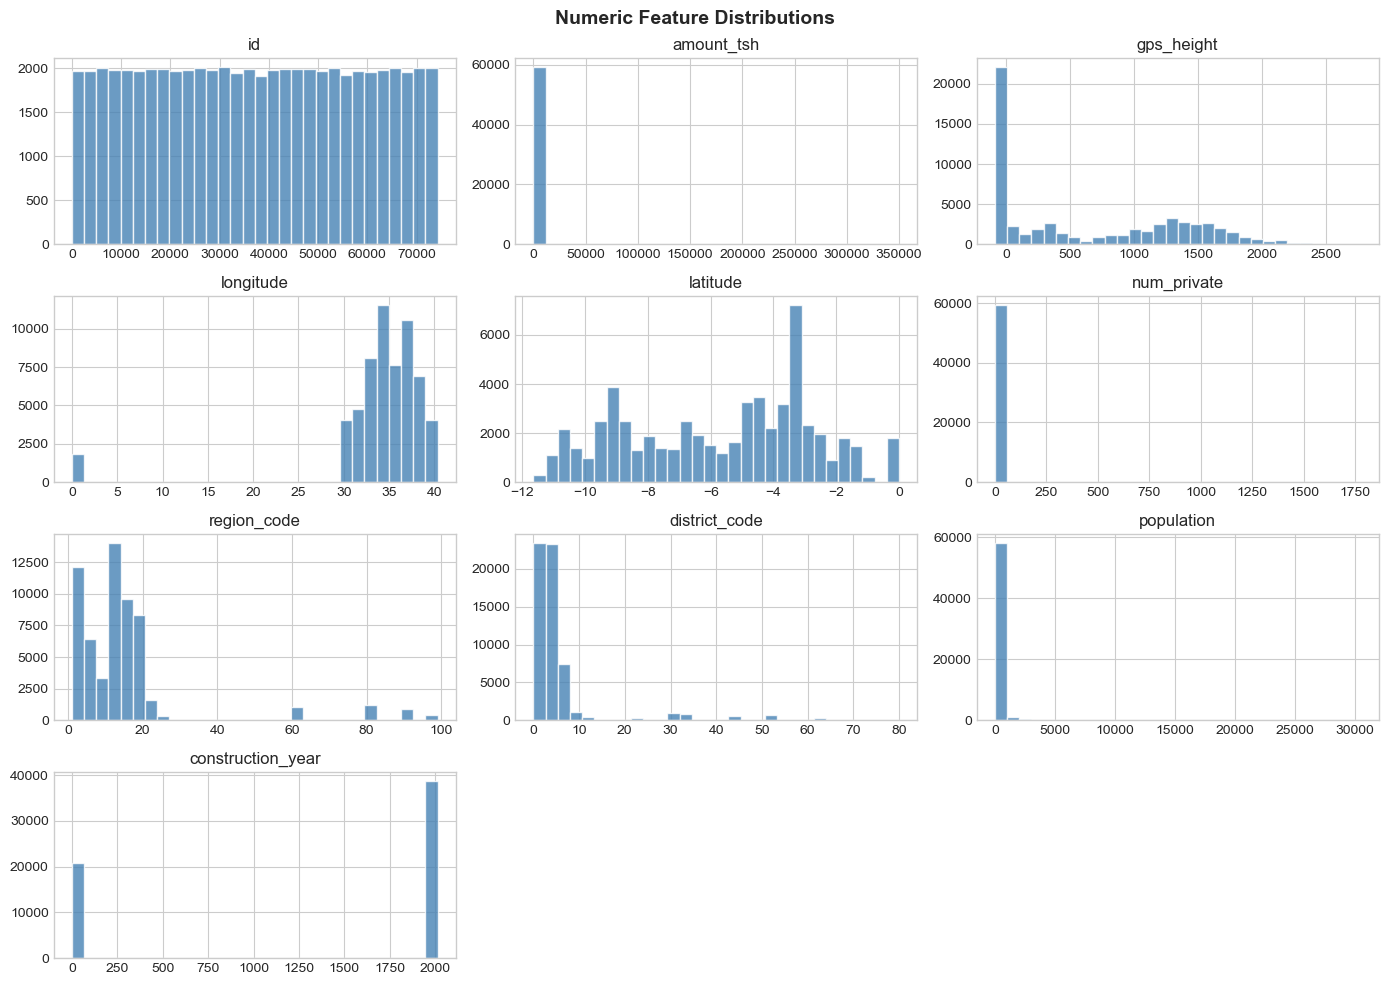

In [90]:
# Histograms for numeric features
train_df.hist(
    figsize = (14, 10), 
    bins = 30, 
    edgecolor = 'white',
    color = 'steelblue',
    alpha = 0.8
)

plt.suptitle('Numeric Feature Distributions', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

See features that have outliers. We will use boxplots for this.

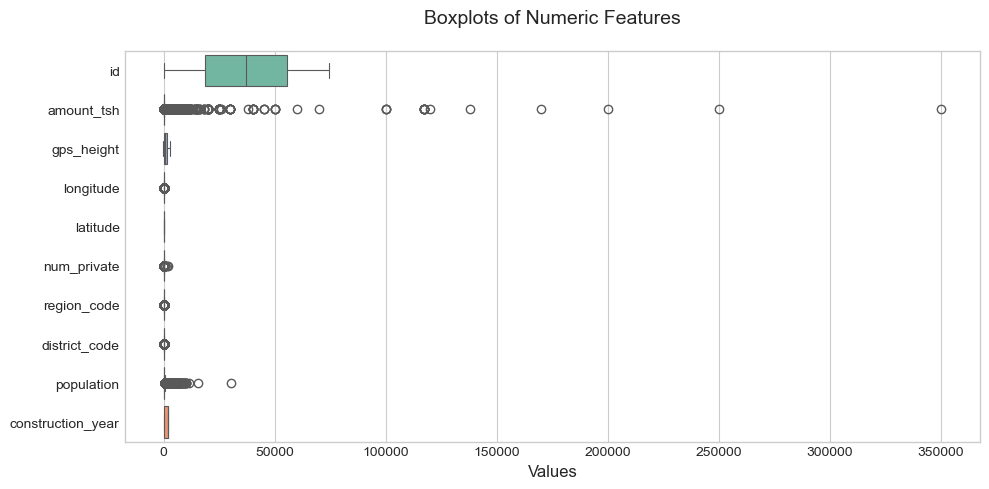

In [91]:
# Save numerical features into a variable
numeric_cols = train_df.select_dtypes(include = np.number).columns

# Plot boxplots
plt.figure(figsize = (10, 5))
sns.boxplot(
    data = train_df[numeric_cols], 
    orient = 'h',
    palette = 'Set2',
    linewidth = 0.8
)

plt.title('Boxplots of Numeric Features', fontsize = 14, pad = 20)
plt.xlabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

> *Observation:* A few things jump out immediately:  
- **gps_height** has negative values (wells below sea level? Likely data entry errors).  
- **longitude** and **latitude** include zeros, which don’t make geographical sense for Tanzania. Could they be placeholders for missing data?  
- **amount_tsh** is heavily skewed, with most values at zero but an extreme max of 350,000. That screams outliers, albeit they could be genuine.  
- **num_private** is basically all zeros, with a wild outlier at 1,776. Likely a useless feature. Subject for further scrutiny. 
- **construction_year** has suspicious zeros, even though we know wells can’t be built in year 0.  
- **population** is wildly imbalanced: many zeros, but a max of 30,500, suggesting poor recording or aggregation issues.  

In short: while the dataset is large and rich, it carries its fair share of quirks that need cleaning before any serious modeling. 

Now let's shift our focus to the categorical variables.

In [92]:
# Get categorical columns
train_df.select_dtypes(include = 'object').columns.tolist()

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

> *Observation:* Looks like our data is mostly categorical. We will do the same as we did with numerical features and check summary statistics

In [93]:
# Get descriptive statistics for categorical columns
train_df.describe(include = 'object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


Because of their large number, we will save the visualisations for the data cleaning phase.

> *Observation:* The categorical landscape is just as messy as the numeric side:
- Target distribution: status_group is imbalanced; functional dominates (32,259), followed by non-functional (24,660), with needs repair trailing (3,481). That skew will need attention during modeling.    
- High cardinality: Features like 'funder' (1,896 unique), 'installer' (2,145 unique), and 'wpt_name' (37,399 unique!) are way too granular. Many of these are variations of the same entity (e.g “Government of Tanzania” vs “Govt Tanzania”). These will need collapsing or encoding strategies.  
- Dominant modes: Some variables are massively imbalanced; 'public_meeting' is “True” for 51,011 out of 56,066 records, and 'payment_type = never pay' accounts for 25,348 records.  
- Geographic hierarchy: 'region', 'lga', and 'ward' provide location granularity at different levels. Useful, but they’ll need careful handling to avoid multicollinearity.  
- Waterpoint design: 'waterpoint_type' and 'waterpoint_type_group' overlap heavily. Likely redundant features.  
- Suspicious entries: The most common 'wpt_name' is literally “none” (3,563 times), which isn’t very informative. Similar issues exist for subvillage names.  

Overall: categorical features offer valuable signals but are cluttered with inconsistencies, redundancies, and heavy skew. Cleaning and grouping will be critical here.  

Because of their large number, we will save the visualisations for the cleaning and EDA (Exploratory Data Analysis) phase.

Next we check for data completeness and sanity. This is all about checking for missing values distribution and duplicated values.

In [94]:
# Check for duplicates
print("Duplicate:", train_df.duplicated().sum())

# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Duplicate: 0

Missing values and percentage:
                    Missing Values  Percentage
funder                       3637    6.122896
installer                    3655    6.153199
wpt_name                        2    0.003367
subvillage                    371    0.624579
public_meeting               3334    5.612795
scheme_management            3878    6.528620
scheme_name                 28810   48.501684
permit                       3056    5.144781


> *Observation:* Duplicates aren’t an issue (zero found), but missing values definitely are:  
- Moderate gaps (5–6%) in 'funder', 'installer', 'public_meeting', 'scheme_management', and 'permit'. Manageable, but they’ll need imputation or categorical grouping.  
- Negligible gaps (<1%) in 'wpt_name' and 'subvillage', easy wins for cleanup.  
- Massive hole (49%) in 'scheme_name', making it essentially unusable in raw form. Either it gets dropped, or we engineer a high-level indicator (e.g “has_scheme_name” vs “no_scheme_name”).  

Overall, the dataset is mostly complete, but there are pockets of systematic missingness (especially around water management schemes) that hint at recording inconsistencies in the field.  

Awesome! Now, let’s turn to the test dataset. Unlike the training data, we won’t merge this with labels. Doing so would be both invalid and a source of data leakage. 

However, it’s still important to **audit and clean the test set** to ensure it follows the same structure and quality standards as the training data. That way, when our model is deployed, it will be working with reliable and consistent inputs.  

In [95]:
# Load entire dataset
test_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [96]:
# Check the shape of the dataset
print(f"The features dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The features dataset has 14850 rows and 40 columns.


> *Observation:* The test dataset is equally substantial, with over **14,000 rows** spanning **40 columns**. While it mirrors the training set in structure, it naturally lacks the target variable. This still gives us a rich feature space to validate and refine our preprocessing steps, ensuring consistency between training and testing pipelines.  

Next, let’s review the column names to check how clean, consistent, and intuitive they are.  

In [97]:
# Check column names
test_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

> *Observation:* The test dataset also comes with well-structured column names; neat, intuitive, and free from the usual suspects like typos, stray spaces, or inconsistent casing.   

Our next step is a metadata check. From there, we’ll classify the features into numerical and categorical groups to set the stage for cleaning.  

In [98]:
# Get metadata
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [99]:
# Get numerical columns
test_df.select_dtypes(include = 'number').columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

> *Observation:* No apparent type mismatches here either. The numeric features in the test dataset are stored correctly as numeric.  

As with the training set, we’ll validate this by reviewing the summary statistics. This step not only reconfirms the integrity of the data types but also offers a quick snapshot of the feature distributions and ranges.  

Reassuringly, the numerical columns have been kept consistent between the training and test datasets, which makes preprocessing and modeling much smoother.  

In [100]:
# Get descriptive statistics for numerical columns
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14850.0,37161.972929,21359.364833,10.000000,18727.000000,37361.500000,55799.750000,7.424900e+04
amount_tsh,14850.0,322.826983,2510.968644,0.000000,0.000000,0.000000,25.000000,2.000000e+05
gps_height,14850.0,655.147609,691.261185,-57.000000,0.000000,344.000000,1308.000000,2.777000e+03
longitude,14850.0,34.061605,6.593034,0.000000,33.069455,34.901215,37.196594,4.032502e+01
latitude,14850.0,-5.684724,2.940803,-11.564592,-8.443970,-5.049750,-3.320594,-2.000000e-08
num_private,14850.0,0.415084,8.167910,0.000000,0.000000,0.000000,0.000000,6.690000e+02
region_code,14850.0,15.139057,17.191329,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,14850.0,5.626397,9.673842,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,14850.0,184.114209,469.499332,0.000000,0.000000,20.000000,220.000000,1.146900e+04
construction_year,14850.0,1289.708350,955.241087,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03


Visualise this distribution

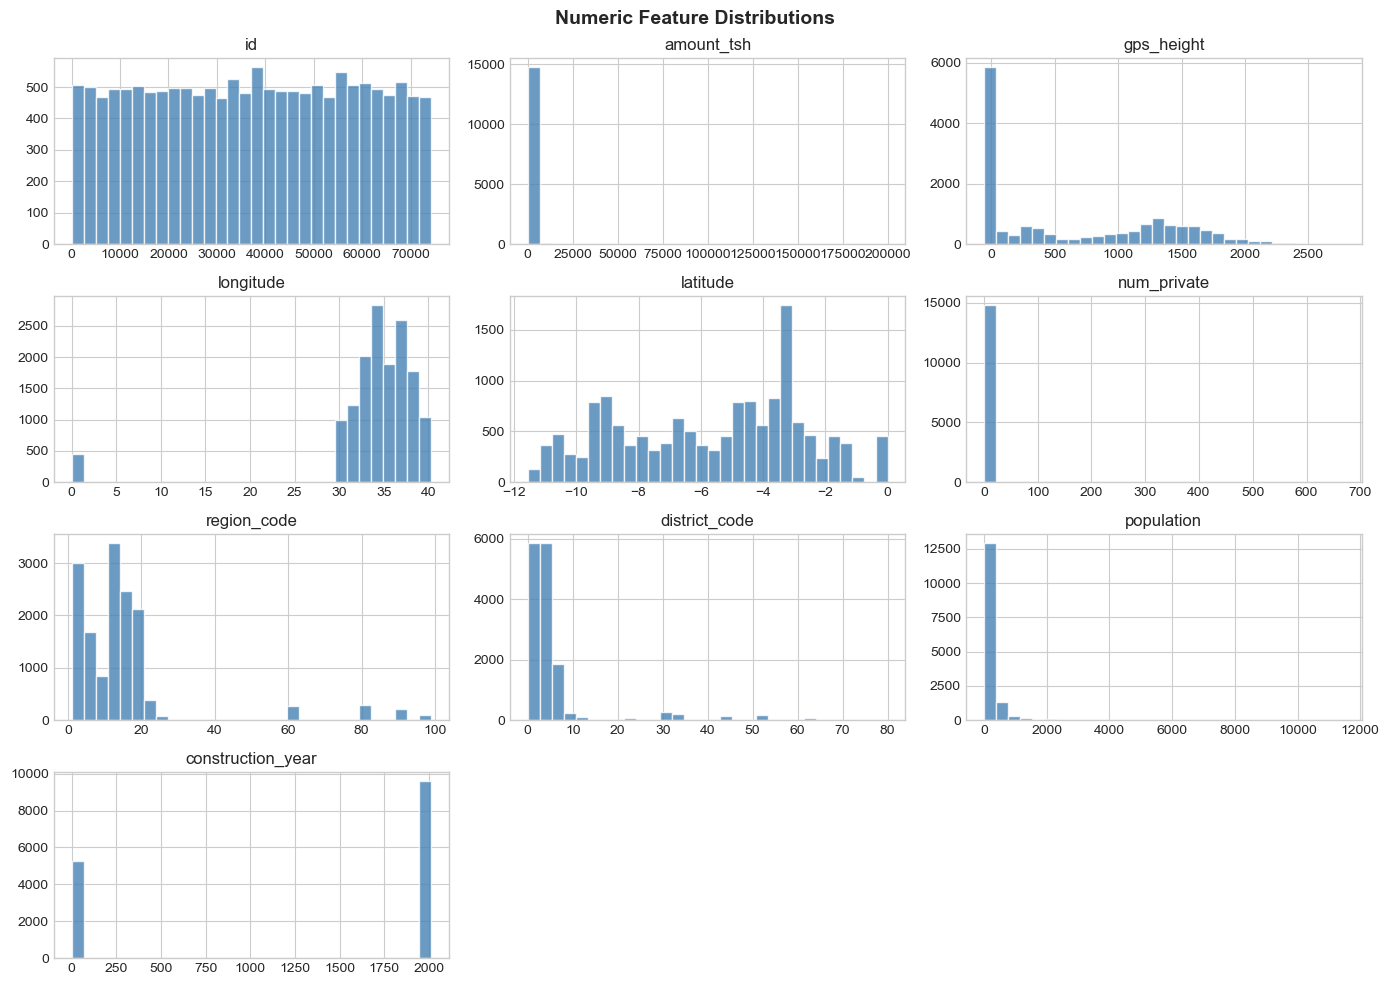

In [101]:
# Histograms for numeric features
test_df.hist(
    figsize = (14, 10), 
    bins = 30, 
    edgecolor = 'white',
    color = 'steelblue',
    alpha = 0.8
)

plt.suptitle('Numeric Feature Distributions', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

Check for outliers

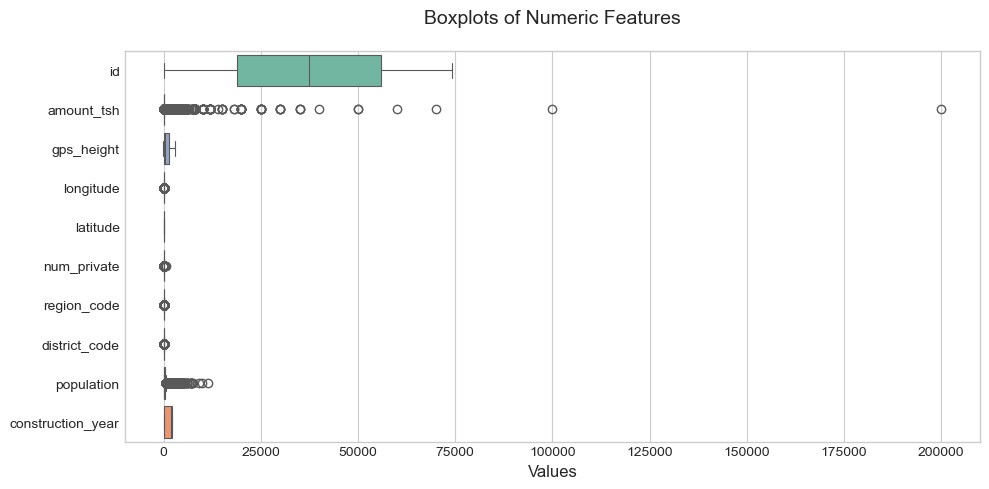

In [103]:
# Save numerical features into a variable
numeric_cols = test_df.select_dtypes(include = np.number).columns

# Plot boxplots
plt.figure(figsize = (10, 5))
sns.boxplot(
    data = test_df[numeric_cols], 
    orient = 'h',
    palette = 'Set2',
    linewidth = 0.8
)

plt.title('Boxplots of Numeric Features', fontsize = 14, pad = 20)
plt.xlabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

> *Observation:* The test dataset shows similar quirks to what we saw in training:  
- gps_height still contains negative values, which don’t make physical sense and likely reflect data entry issues.  
- longitude and latitude feature zeros again. Almost certainly placeholders for missing or invalid coordinates.  
- amount_tsh remains heavily skewed, with a bulk of zeros contrasted by very large outliers.  
- num_private is nearly all zeros, with just a handful of anomalous non-zero entries, reinforcing its low utility.  
- construction_year includes zeros, which are unrealistic and should be treated carefully.  
- population carries the same imbalance as in training. Large clusters of zeros alongside extreme highs, pointing to inconsistent reporting.  

In short: the test set mirrors the messiness of the training set, which is a good thing. It means our cleaning strategy can stay consistent.  

Now, let’s move on to exploring the categorical features.  

In [104]:
# Get categorical columns
test_df.select_dtypes(include = 'object').columns.tolist()

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [105]:
# Get descriptive statistics for categorical columns
test_df.describe(include = 'object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14850,13980,13973,14850,14850,14751,14850,14850,14850,14029,...,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850
unique,331,979,1091,10840,9,8443,21,125,1959,2,...,7,8,6,5,5,10,7,3,7,6
top,2013-02-03,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,138,2215,4349,877,2623,140,1311,625,79,12738,...,6364,12687,12687,8336,8336,4316,4316,11492,7106,8614


> *Observation:* The categorical profile of the test set mirrors the quirks of training:  
- High cardinality persists variables like 'funder', 'installer', and especially 'wpt_name' still carry thousands of unique values, many of which are near-duplicates or inconsistencies.  
- Dominant categories reappear for instance, 'public_meeting' skews heavily toward “True,” and 'payment_type' is once again dominated by “never pay.”  
- Hierarchical geography remains intact features like 'region', 'lga', and 'ward' are consistent, but the overlap suggests potential multicollinearity if all levels are used naively.  
- Overlap and redundancy variables such as 'waterpoint_type' and 'waterpoint_type_group' continue to carry nearly the same information.  
- Suspicious placeholders entries like “none” for 'wpt_name' or vague subvillage names are still common, signaling data quality issues.  

Overall: the categorical landscape in the test set is consistent with training, which is exactly what we want. That means our eventual cleaning strategies can be applied uniformly across both datasets.  

Next, we’ll check for data completeness and sanity, i.e. missing values distribution and duplicate records.  

In [106]:
# Check for duplicates
print("Duplicate:", test_df.duplicated().sum())

# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = test_df.isnull().sum()
missing_percentage = (missing_values / len(test_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Duplicate: 0

Missing values and percentage:
                    Missing Values  Percentage
funder                        870    5.858586
installer                     877    5.905724
subvillage                     99    0.666667
public_meeting                821    5.528620
scheme_management             969    6.525253
scheme_name                  7242   48.767677
permit                        737    4.962963


> *Observation:* The test set mirrors the training data in terms of completeness issues. Most columns are well populated. The pattern of missingness suggests that the same collection practices and challenges applied to both datasets, which is useful for designing consistent cleaning strategies.  